<a href="https://colab.research.google.com/github/HyeJeongIm/AI_HUB_yangjae/blob/main/week01/Image_CNN/0711_Fashion_MNIST_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(np.max(train_x[0]))
print(train_x[0].shape)
print("train_x.shape: ", train_x.shape)
print("test_x.shape: ", test_x.shape)

255
(28, 28)
train_x.shape:  (60000, 28, 28)
test_x.shape:  (10000, 28, 28)


In [7]:
train_x = train_x / 255.0
test_x = test_x / 255.0

In [8]:
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

print(train_x.shape, test_x.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
def build_model():
  model = Sequential()

  model.add(Conv2D(input_shape = (28,28,1), kernel_size = (3, 3), filters = 16))
  model.add(Conv2D(kernel_size = (3, 3), filters = 32))
  model.add(Conv2D(kernel_size = (3, 3), filters = 64))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  
  return model 

cnn_model = build_model()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
Non-

In [14]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = cnn_model.fit(train_x, train_y, epochs = 10, validation_split = 0.25)

Epoch 1/10
1407/1407 [==============================] - 18s 5ms/step - loss: 0.4669 - accuracy: 0.8339 - val_loss: 0.3786 - val_accuracy: 0.8616
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3373 - accuracy: 0.8766 - val_loss: 0.3751 - val_accuracy: 0.8663
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2866 - accuracy: 0.8949 - val_loss: 0.3632 - val_accuracy: 0.8719
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2411 - accuracy: 0.9098 - val_loss: 0.3831 - val_accuracy: 0.8652
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2114 - accuracy: 0.9210 - val_loss: 0.4280 - val_accuracy: 0.8643
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.1820 - accuracy: 0.9324 - val_loss: 0.4516 - val_accuracy: 0.8708
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1616 - accuracy: 0.9395 - val_loss: 0.5468 - val_accurac

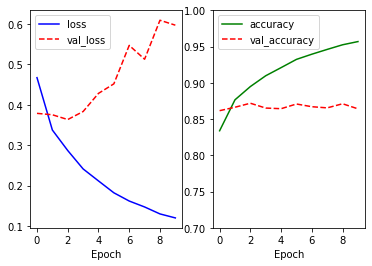

[0.6490989327430725, 0.8604000210762024]

In [17]:
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], 'g-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

cnn_model.evaluate(test_x, test_y, verbose=0)